## Seb's seed regions
- NAcc: x = ±9, y = 9, z = −8
- dCaud: x = ±13, y = 15, z = 9
- dPut: x = ±28, y = 1, z = 3
- vPut: x = ±20, y = 12, z = −3

## Cross reference with Ye's parcellation
(manually using mricron)
- 'NAc-shell' 23/50
- 'CAU-DA' 17/44
- 'PUT-DP' 12/39
- 'PUT-VA' 15/42

In [1]:
import nibabel as nb
from src.parcellate import decompose_cifti
import numpy as np
import nilearn.plotting as nplt

# Seb's original coords
# coords to focus cross on
coords = np.array([[-9, 9, -8],
                   [13, 15, 9],
                   [28, 1, 3],
                   [20, 12, -3]])

label_file = "/home/lukeh/LabData/Lab_LucaC/Luke/Backups/hpc_backups/parcellations/Tian2020MSA_2023/3T/Cortex-Subcortex/Schaefer2018_400Parcels_7Networks_order_Tian_Subcortex_S4_label.txt"
n_rois = 454

parcel_labels = []
with open(label_file, 'r') as f:
    for count, line in enumerate(f, start=0):
        if count % 2 == 0:
            parcel_labels.append(line.split('\n')[0])

# note these are indexing by 0 - in a volume add +1
tian_indices = np.array([[23, 50],
                         [17, 44],
                         [12, 39],
                         [15, 42]])
for i in tian_indices:
    print(parcel_labels[i[0]], '/', parcel_labels[i[1]])

NAc-shell-rh / NAc-shell-lh
CAU-DA-rh / CAU-DA-lh
PUT-VA-rh / PUT-VA-lh
PUT-DP-rh / PUT-DP-lh


## Cross reference with Yeo / metamatching template:
Proposed Parcel IDS
- 409, 418,
- 403, 413,
- 404, 414,
- 404, 414

pixdim[1,2,3] should be non-zero; setting 0 dims to 1
/home/lukeh/miniconda3/envs/MetaMatch/lib/python3.9/site-packages/nilearn/plotting/img_plotting.py:300: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  anat_img = load_mni152_template()
/home/lukeh/miniconda3/envs/MetaMatch/lib/python3.9/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


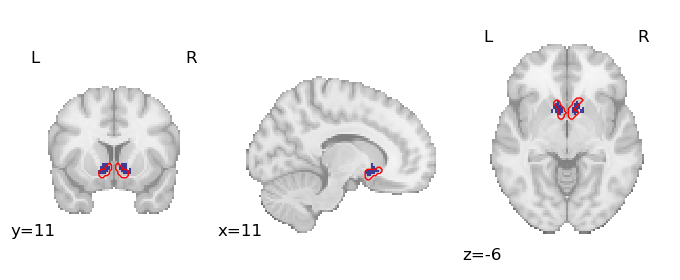

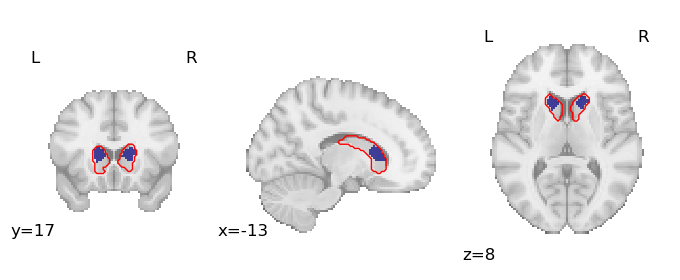

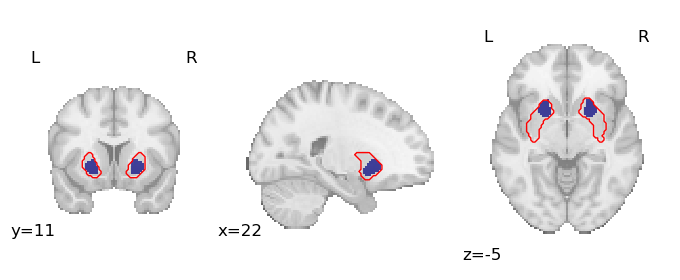

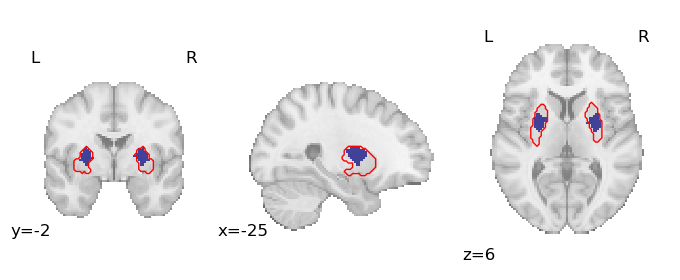

In [3]:
import nilearn.plotting as nplt
from nilearn.image import new_img_like
import matplotlib.pyplot as plt

# load and plot Tians S4 regions
tian_file = '/home/lukeh/hpcworking/shared/parcellations/Tian2020MSA_v1.1/3T/Cortex-Subcortex/Schaefer2018_400Parcels_17Networks_order_Tian_Subcortex_S4.dlabel.nii'
tian_vol, _, _ = decompose_cifti(nb.load(tian_file))

# load the volume we want to replace with
volume = '/home/lukeh/projects/CBN_MetaMatch/data/atlas/subcortical_HCP_cbig_order.dlabel.nii'
yeo_vol, _, _ = decompose_cifti(nb.load(volume))

#t1_img = "../data/atlas/MNI152_T1_1mm.nii.gz"

# with tian you have to account for volume labels versus connectivity labels
tian_seeds = tian_indices + 1

# account for cortex subcortex
yeo_seeds = np.array([[409, 418],
             [403, 413],
             [404, 414],
             [404, 414]])
yeo_seeds = yeo_seeds - 400


for i, j in zip(tian_seeds, yeo_seeds):

    data = np.squeeze(tian_vol.get_fdata().copy())
    mask = np.zeros(data.shape)
    mask[data == i[0]] = 1
    mask[data == i[1]] = 1
    tian_img = new_img_like(tian_vol, mask)

    data = np.squeeze(yeo_vol.get_fdata().copy())
    mask = np.zeros(data.shape)
    mask[data == j[0]] = 1
    mask[data == j[1]] = 1
    yeo_img = new_img_like(yeo_vol, mask)
    #display = plotting.plot_anat(cut_coords=c, draw_cross=True)
    display = nplt.plot_roi(tian_img, draw_cross=False)
    #display.add_contours(tian_img, colors="r", levels=[1])
    display.add_contours(yeo_img, colors="r", levels=[1], linewidths=1)
    plt.savefig("../results/figures/compare_roi/roi"+str(i[0])+'.jpeg', dpi=600)
    plt.show()


In [10]:

def get_cropped_img(img,
                    x_start_buffer=10,
                    x_finish_buffer=10,
                    y_start_buffer=10,
                    y_finish_buffer=10,
                    ):
    # Returns a cropped input image

    # average across color information (3rd dimension)
    m_img = np.mean(img, axis=2)

    x_start = (np.where(np.argmax(m_img != np.max(img), axis=0))[0][0] ) - x_start_buffer
    x_finish = (np.where(np.argmax(m_img != np.max(img), axis=0))[0][-1]) + x_finish_buffer
    y_start = np.where(np.argmax(m_img != np.max(img), axis=1))[0][0] - y_start_buffer
    y_finish = np.where(np.argmax(m_img != np.max(img), axis=1))[0][-1] + y_finish_buffer

    # Crop the input image based on determined crop heights and widths
    img_cropped = img[y_start:y_finish, x_start:x_finish, :]
    return img_cropped

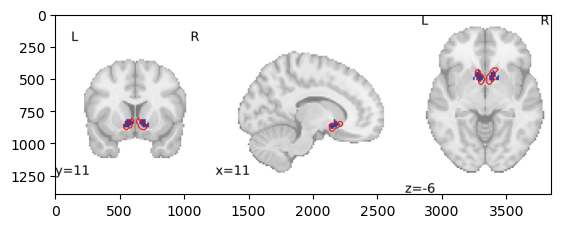

In [11]:
for i, j in zip(tian_seeds, yeo_seeds):

    x = "../results/figures/compare_roi/roi"+str(i[0])+'.jpeg'
        # get image
    img = plt.imread(x)
    plt.imshow(img)
    img_cropped = get_cropped_img(img,
                                    x_start_buffer=0,
                                    x_finish_buffer=10,
                                    y_start_buffer=10,
                                    y_finish_buffer=10)
    plt.imshow(img_cropped)
    break

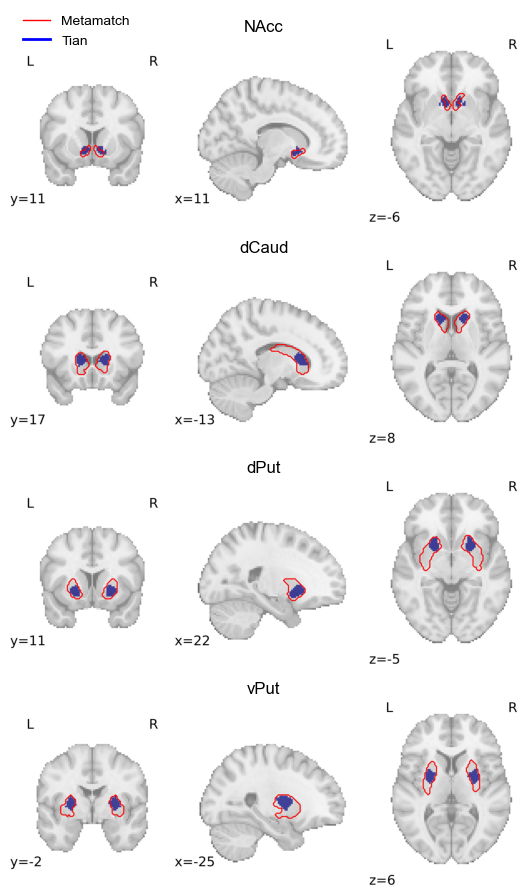

In [33]:
import matplotlib.gridspec as gridspec
import seaborn as sns
from matplotlib.lines import Line2D

plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'
# gridspec inside gridspec
fig = plt.figure(figsize=(7.4, 11))

# create gridspec between brains and scatter plot
gs = gridspec.GridSpec(4, 1, figure=fig, hspace=0.2, wspace=0)

titles = ['NAcc', 'dCaud', 'dPut', 'vPut']
for count, (i, title) in enumerate(zip(tian_seeds, titles)):
    x = "../results/figures/compare_roi/roi"+str(i[0])+'.jpeg'

    # get image
    img = plt.imread(x)
    # crop image
    img_cropped = get_cropped_img(img,
                                    x_start_buffer=0,
                                    x_finish_buffer=10,
                                    y_start_buffer=10,
                                    y_finish_buffer=10)
    
    # get ax
    ax = fig.add_subplot(gs[count])
    ax.set_title(title, fontsize=12)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(img_cropped, aspect='equal')
    sns.despine(left=True, bottom=True, ax=ax)

    if count == 0:
        custom_lines = [Line2D([0], [0], color='r', lw=1),
                        Line2D([0], [0], color='b', lw=2)]

        ax.legend(custom_lines, ['Metamatch', 'Tian'], frameon=False,
                 fontsize=9, loc='upper left', handlelength=1)
        sns.move_legend(ax, "upper left", bbox_to_anchor=(0, 1.2))
#plt.savefig('../results/figures/atlas_comparison.svg')
plt.savefig('../results/figures/atlas_comparison.jpeg', dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
import matplotlib.gridspec as gridspec
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'
# gridspec inside gridspec
fig = plt.figure(figsize=(7.4, 4.5))

# create gridspec between brains and scatter plot
gs0 = gridspec.GridSpec(4, 1, height_ratios=(0.01, 0.4, 0.09, 0.5),
                        figure=fig, hspace=0.1, wspace=0)

# Create gridspec for titles
gs_titles = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs0[0],
                                        hspace=0, wspace=0)
for i, title in enumerate(['NAcc', 'dCaud', 'dPut', 'vPut']):
    ax = fig.add_subplot(gs_titles[i])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])
    ax.text(0.5, 0, title, ha="center", va="bottom", fontsize=10)
    sns.despine(left=True, bottom=True, ax=ax)

# create nested gridspec for brains
gs00 = gridspec.GridSpecFromSubplotSpec(2, 8, subplot_spec=gs0[1],
                                        hspace=0, wspace=0)

count = 0
for view in ['lateral', 'medial']:
    for roi in ['NAc-shell-rh', 'CAU-DA-rh', 'PUT-VA-rh', 'PUT-DP-rh']:
        for hemi in ['left', 'right']:

            # get image
            img = plt.imread(f"../results/figures/HCP/{roi}_{hemi}_{view}.jpeg")
            x_start_buffer = np.nan
            x_finish_buffer = np.nan

            if count == 7 or count == 15:
                x_start_buffer = 5
                x_finish_buffer = 0

            elif count % 2 != 0:
                x_finish_buffer = 50
                x_start_buffer = 5

            if count == 0 or count == 8:
                x_start_buffer = 0
                x_finish_buffer = 5

            elif count % 2 == 0:
                x_start_buffer = 50
                x_finish_buffer = 5

            img_cropped = get_cropped_img(img,
                                          x_start_buffer=x_start_buffer,
                                          x_finish_buffer=x_finish_buffer,
                                          y_start_buffer=1,
                                          y_finish_buffer=1)
            
            # get ax
            ax = fig.add_subplot(gs00[count])
            ax.set_xticklabels([])
            ax.set_yticklabels([])
            ax.set_xticks([])
            ax.set_yticks([])
            ax.imshow(img_cropped, aspect='equal')
            sns.despine(left=True, bottom=True, ax=ax)
            if count == 0:
                ax.text(-0.45, 1.0, "A", fontsize=12, ha='left', transform=ax.transAxes)
            count = count+1

In [ ]:
def get_cropped_img(img,
                    x_start_buffer=10,
                    x_finish_buffer=10,
                    y_start_buffer=10,
                    y_finish_buffer=10,
                    ):
    # Returns a cropped input image

    # average across color information (3rd dimension)
    m_img = np.mean(img, axis=2)

    x_start = (np.where(np.argmax(m_img != np.max(img), axis=0))[0][0] ) - x_start_buffer
    x_finish = (np.where(np.argmax(m_img != np.max(img), axis=0))[0][-1]) + x_finish_buffer
    y_start = np.where(np.argmax(m_img != np.max(img), axis=1))[0][0] - y_start_buffer
    y_finish = np.where(np.argmax(m_img != np.max(img), axis=1))[0][-1] + y_finish_buffer

    # Crop the input image based on determined crop heights and widths
    img_cropped = img[y_start:y_finish, x_start:x_finish, :]
    return img_cropped

In [ ]:
display?

In [ ]:
plotting.plot_roi?

In [ ]:
j